<a href="https://colab.research.google.com/github/jpantojaj/Backtesting_Stresstesting/blob/main/Sesi%C3%B3n_6_3_SeriesTemporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio

La idea del presente ejercicio es explorar las diferentes variables macroeconomicas y su correlación con la Tasa de Morosidad.

Esto con el propósito de saber que variables nos podrian ayudar a explicar su comportamiento y poder predecir comportamientos futuros, lo cual es la base para fabricar escenarios de Stress.

Revisaremos las siguientes variables (Fuentes Estadísticas BCR ySBS):

PBI_vpa: Crecimiento del PBI como variación porcentual anual

IDI_vpa: Crecimiento del Indice de Demanda Interna como variación porcentual anual

TI_vpa: Crecimiento de la Tasa de Intercambio como variación porcentual anual

IPC_vpa: Crecimiento del Indice de Precio al Consumidor como variación porcentual anual

TD_mm3: Tasa de desempleo media movil mensual

TAMN_tea: Tasa Activa Promedio en Moneda Nacional (TEA)

TCI_IBProm: Tipo de Cambio Interbancario Promedio

TM_SF: Tasa de Morosidad del Sistema Financiero

## Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Importar Datos

In [2]:
raw_csv_data = pd.read_csv("DataCons_dep.csv")
df=raw_csv_data.copy()
df.head()

,Mes,PBI_vpa,IDI_vpa,IPN_Exp_vpa,IPN_Imp_vpa,TI_vpa,IPC_vpa,TD_mm3,TAMN_tea,TCI_IBProm,TM_SF
0,Jan-04,3.674966,NaN,21.895241,10.333426,10.478978,2.796658,10.100354,23.676494,3.5005,4.11
1,Feb-04,4.245959,NaN,23.212262,6.493451,15.699379,3.428220,10.487665,24.113038,3.4730,4.46
2,Mar-04,5.774257,NaN,35.402157,7.190386,26.319311,2.755869,10.637728,24.528710,3.4602,4.69
3,Apr-04,4.247995,NaN,35.932383,7.544888,26.395949,2.784744,10.495058,24.226751,3.4839,4.61
4,May-04,3.950757,NaN,30.533346,10.228558,18.420624,3.181487,9.999498,24.385480,3.4864,4.46


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mes          165 non-null    object 
 1   PBI_vpa      165 non-null    float64
 2   IDI_vpa      153 non-null    float64
 3   IPN_Exp_vpa  165 non-null    float64
 4   IPN_Imp_vpa  165 non-null    float64
 5   TI_vpa       165 non-null    float64
 6   IPC_vpa      165 non-null    float64
 7   TD_mm3       165 non-null    float64
 8   TAMN_tea     165 non-null    float64
 9   TCI_IBProm   165 non-null    float64
 10  TM_SF        165 non-null    float64
dtypes: float64(10), object(1)
memory usage: 14.3+ KB


In [4]:
df['Mes'] = pd.to_datetime(df['Mes'],format='%b-%y')
df.head()

,Mes,PBI_vpa,IDI_vpa,IPN_Exp_vpa,IPN_Imp_vpa,TI_vpa,IPC_vpa,TD_mm3,TAMN_tea,TCI_IBProm,TM_SF
0,2004-01-01,3.674966,NaN,21.895241,10.333426,10.478978,2.796658,10.100354,23.676494,3.5005,4.11
1,2004-02-01,4.245959,NaN,23.212262,6.493451,15.699379,3.428220,10.487665,24.113038,3.4730,4.46
2,2004-03-01,5.774257,NaN,35.402157,7.190386,26.319311,2.755869,10.637728,24.528710,3.4602,4.69
3,2004-04-01,4.247995,NaN,35.932383,7.544888,26.395949,2.784744,10.495058,24.226751,3.4839,4.61
4,2004-05-01,3.950757,NaN,30.533346,10.228558,18.420624,3.181487,9.999498,24.385480,3.4864,4.46


In [5]:
df.set_index('Mes', inplace=True)

In [6]:
df.head()

,PBI_vpa,IDI_vpa,IPN_Exp_vpa,IPN_Imp_vpa,TI_vpa,IPC_vpa,TD_mm3,TAMN_tea,TCI_IBProm,TM_SF
Mes,,,,,,,,,,
2004-01-01,3.674966,NaN,21.895241,10.333426,10.478978,2.796658,10.100354,23.676494,3.5005,4.11
2004-02-01,4.245959,NaN,23.212262,6.493451,15.699379,3.428220,10.487665,24.113038,3.4730,4.46
2004-03-01,5.774257,NaN,35.402157,7.190386,26.319311,2.755869,10.637728,24.528710,3.4602,4.69
2004-04-01,4.247995,NaN,35.932383,7.544888,26.395949,2.784744,10.495058,24.226751,3.4839,4.61
2004-05-01,3.950757,NaN,30.533346,10.228558,18.420624,3.181487,9.999498,24.385480,3.4864,4.46


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2004-01-01 to 2017-09-01
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PBI_vpa      165 non-null    float64
 1   IDI_vpa      153 non-null    float64
 2   IPN_Exp_vpa  165 non-null    float64
 3   IPN_Imp_vpa  165 non-null    float64
 4   TI_vpa       165 non-null    float64
 5   IPC_vpa      165 non-null    float64
 6   TD_mm3       165 non-null    float64
 7   TAMN_tea     165 non-null    float64
 8   TCI_IBProm   165 non-null    float64
 9   TM_SF        165 non-null    float64
dtypes: float64(10)
memory usage: 14.2 KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PBI_vpa,165.0,5.528778,3.129349,-2.962245,3.384308,5.335451,7.466830,14.127077
IDI_vpa,153.0,6.502992,6.462417,-10.631342,1.754337,5.807277,10.977629,20.182766
IPN_Exp_vpa,165.0,8.964987,19.393727,-30.933096,-7.315718,10.949401,23.874445,52.652127
IPN_Imp_vpa,165.0,4.157984,9.378885,-18.709423,-1.593671,5.041537,10.333426,28.281538
TI_vpa,165.0,4.215807,13.717232,-23.011955,-5.181203,0.963379,12.251679,39.047206
IPC_vpa,165.0,3.052425,1.371829,-0.084042,2.206143,3.066620,3.904555,6.748910
TD_mm3,165.0,7.692116,1.342906,5.423094,6.603627,7.682966,8.739874,11.314711
TAMN_tea,165.0,20.205363,3.359906,15.529300,17.027300,19.300300,23.570000,26.277341
TCI_IBProm,165.0,3.043740,0.265024,2.550500,2.803100,3.084300,3.261800,3.524000
TM_SF,165.0,4.279394,1.400851,0.020000,3.060000,4.230000,5.650000,6.540000


## Explorar Datos

In [10]:
df.isna().sum()

PBI_vpa         0
IDI_vpa        12
IPN_Exp_vpa     0
IPN_Imp_vpa     0
TI_vpa          0
IPC_vpa         0
TD_mm3          0
TAMN_tea        0
TCI_IBProm      0
TM_SF           0
dtype: int64

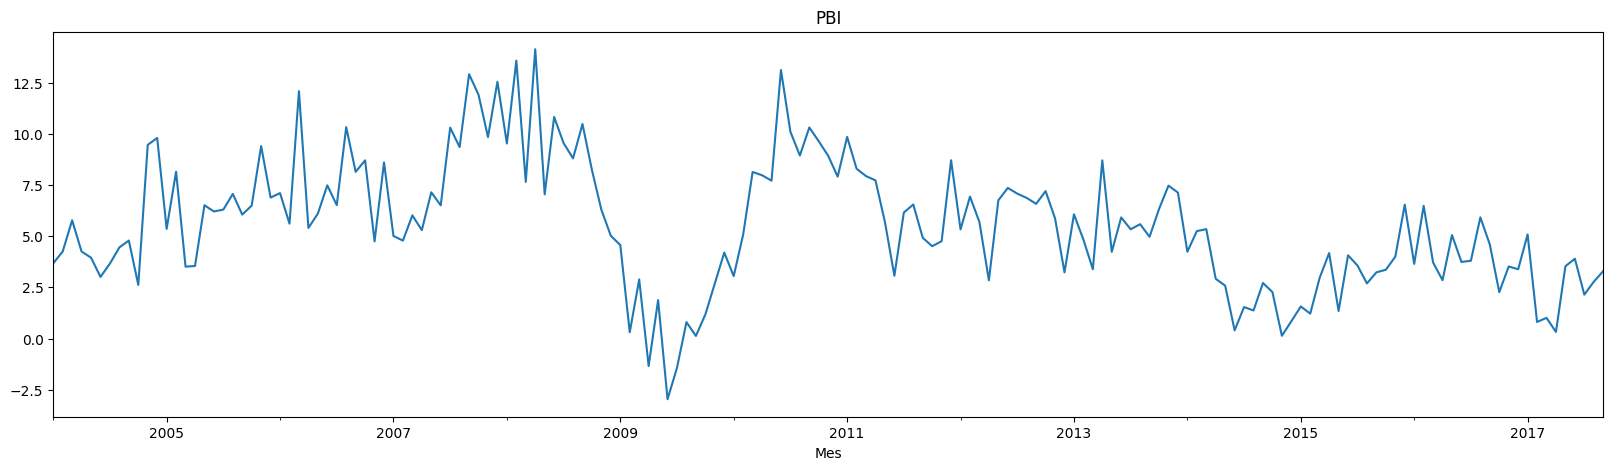

In [11]:
import matplotlib.pyplot as plt
df.PBI_vpa.plot(figsize=(20,5), title = "PBI")
plt.show()

In [12]:
df=df.fillna(method='bfill')
#df=df.fillna(value = df.mean())
df.isna().sum()

PBI_vpa        0
IDI_vpa        0
IPN_Exp_vpa    0
IPN_Imp_vpa    0
TI_vpa         0
IPC_vpa        0
TD_mm3         0
TAMN_tea       0
TCI_IBProm     0
TM_SF          0
dtype: int64

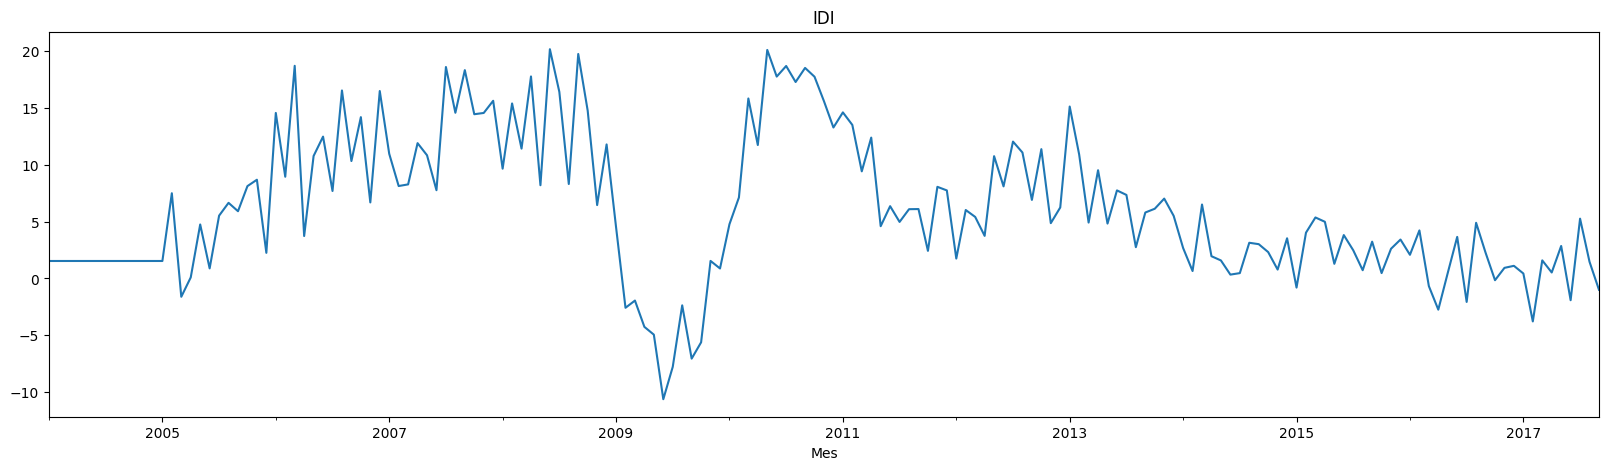

In [13]:
df.IDI_vpa.plot(figsize=(20,5), title = "IDI")
plt.show()

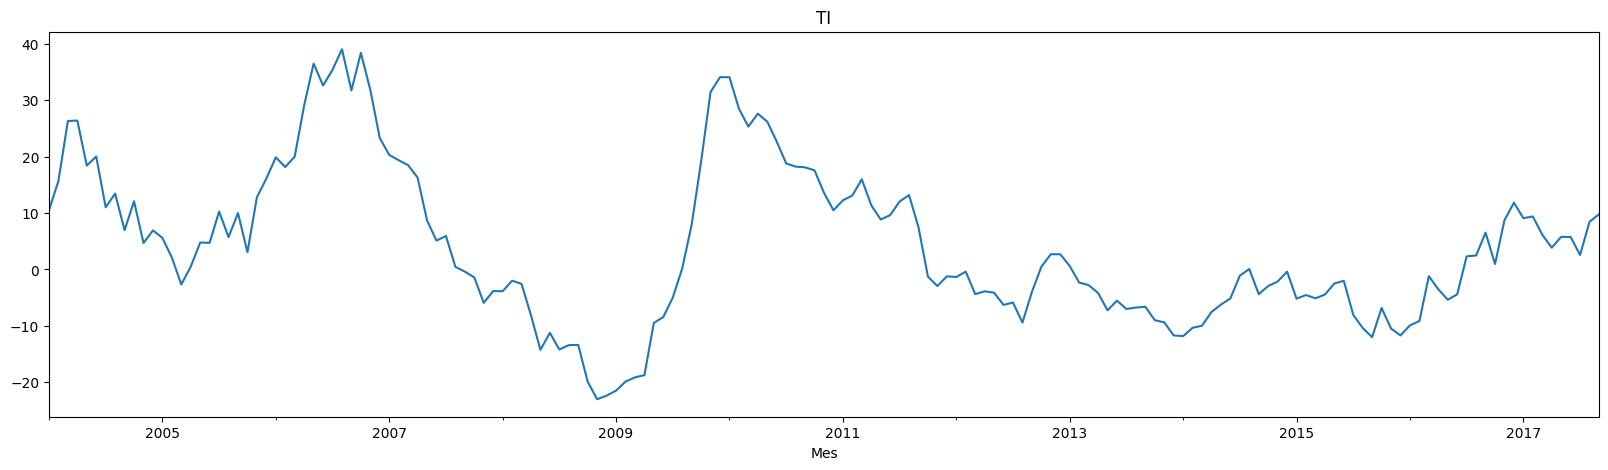

In [14]:
df.TI_vpa.plot(figsize=(20,5), title = "TI")
plt.show()

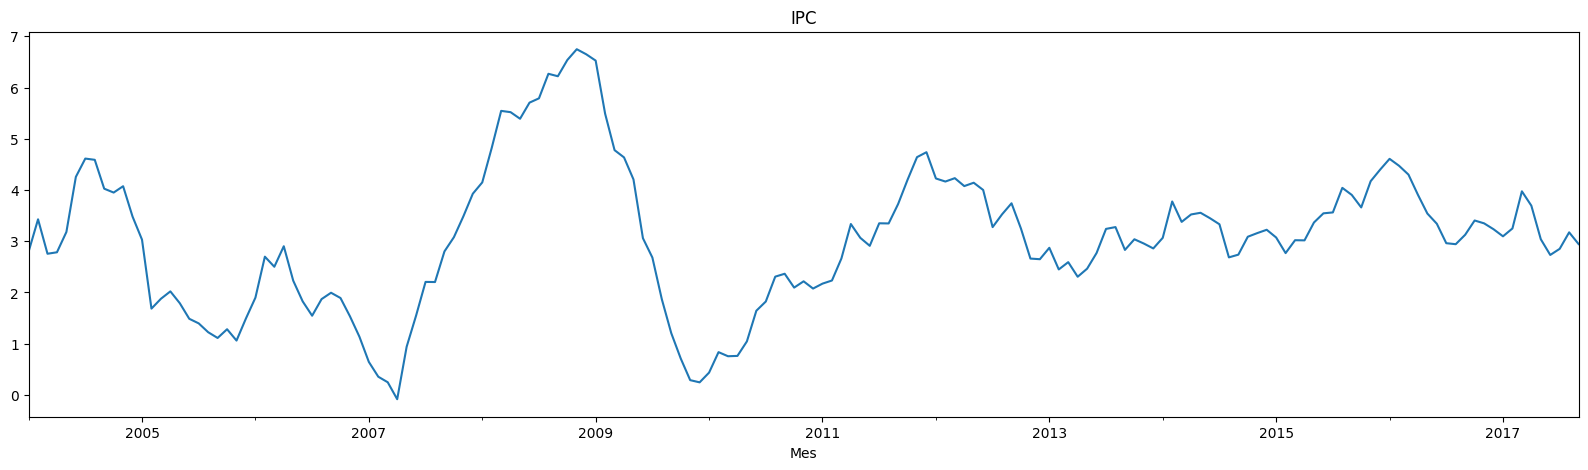

In [15]:
df.IPC_vpa.plot(figsize=(20,5), title = "IPC")
plt.show()

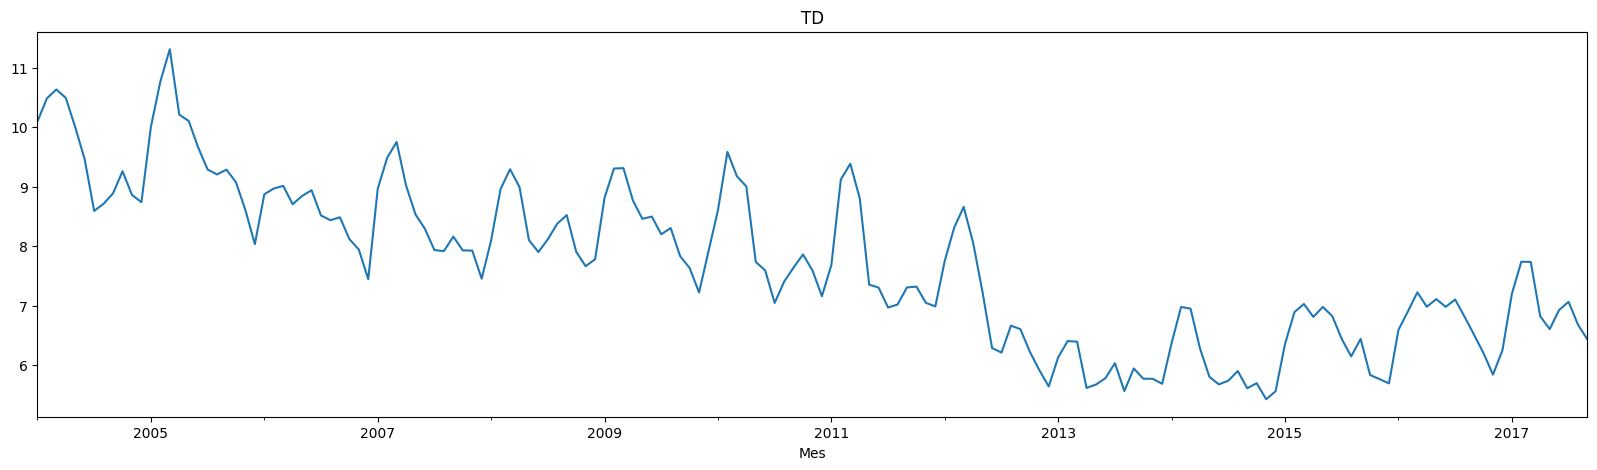

In [16]:
df.TD_mm3.plot(figsize=(20,5), title = "TD")
plt.show()

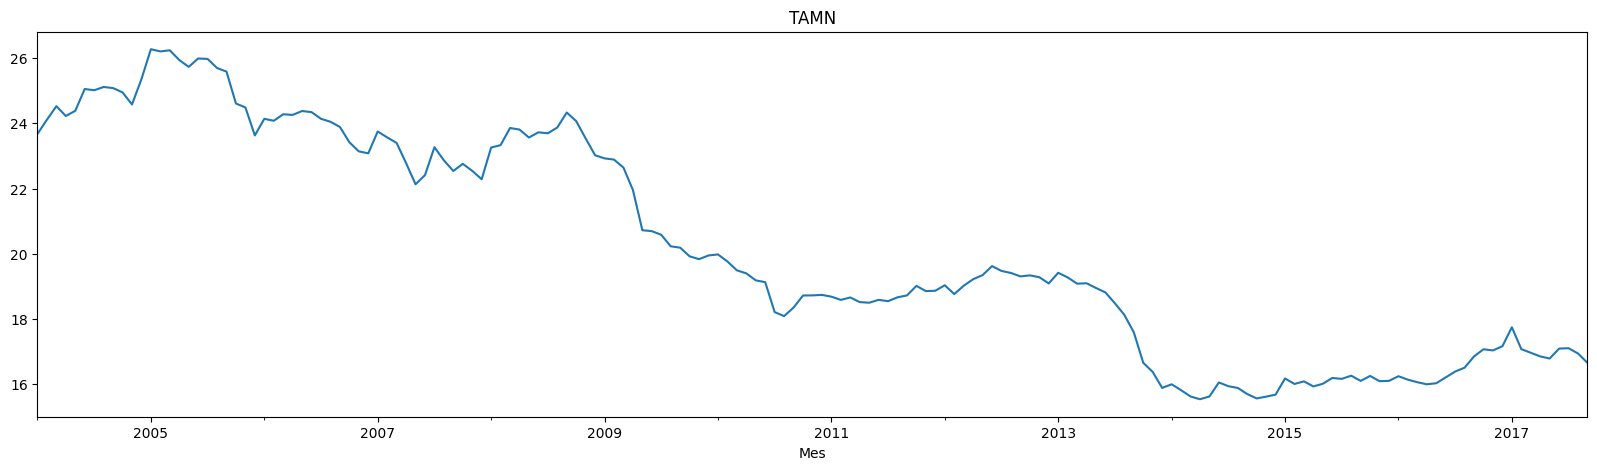

In [17]:
df.TAMN_tea.plot(figsize=(20,5), title = "TAMN")
plt.show()

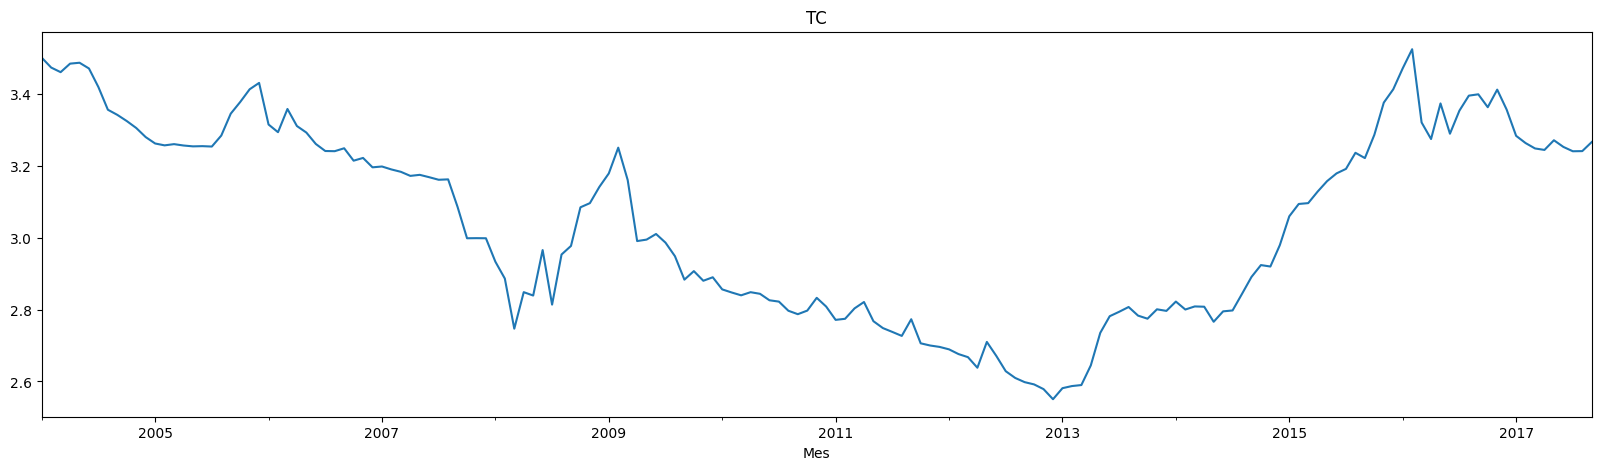

In [18]:
df.TCI_IBProm.plot(figsize=(20,5), title = "TC")
plt.show()

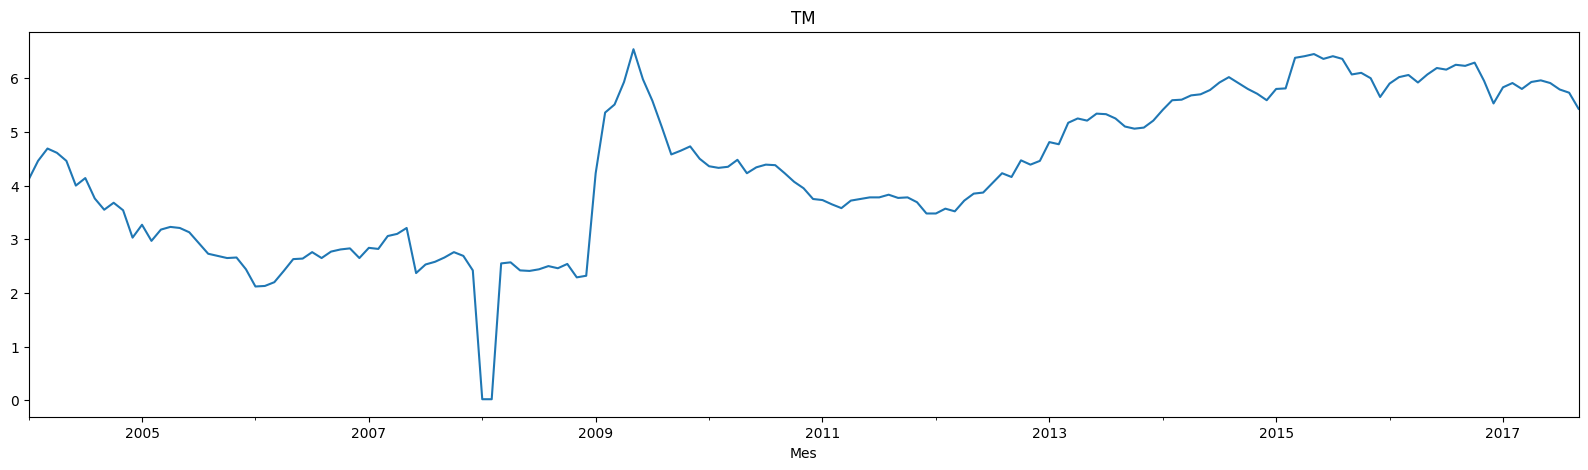

In [19]:
df.TM_SF.plot(figsize=(20,5), title = "TM")
plt.show()

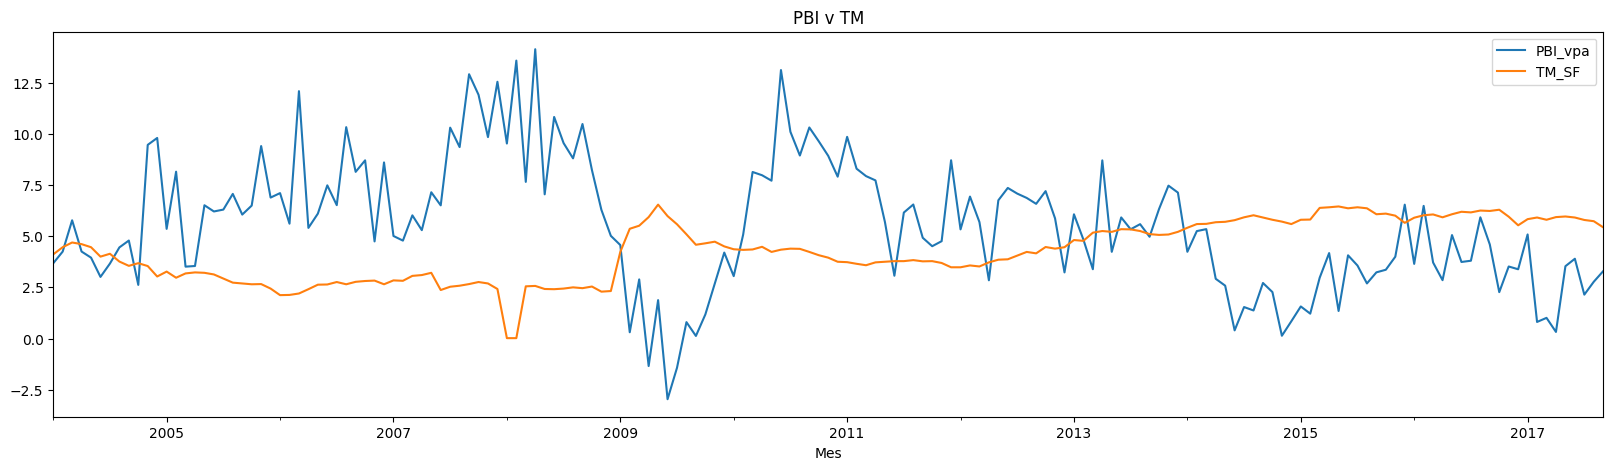

In [20]:
df.PBI_vpa.plot(figsize=(20,5), title = "PBI", legend=True)
df.TM_SF.plot(figsize=(20,5), title = "TM", legend=True)
plt.title("PBI v TM")
plt.show()

## Analizar Datos

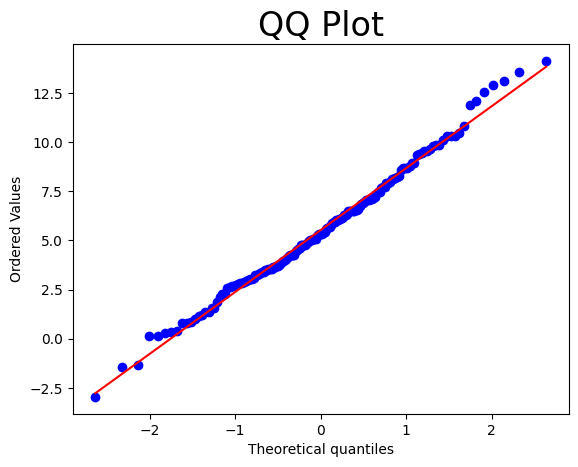

In [21]:
import scipy.stats
import pylab
scipy.stats.probplot(df.PBI_vpa, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

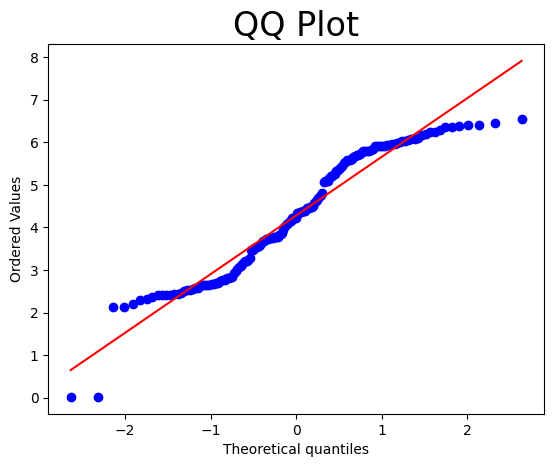

In [22]:
scipy.stats.probplot(df.TM_SF, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

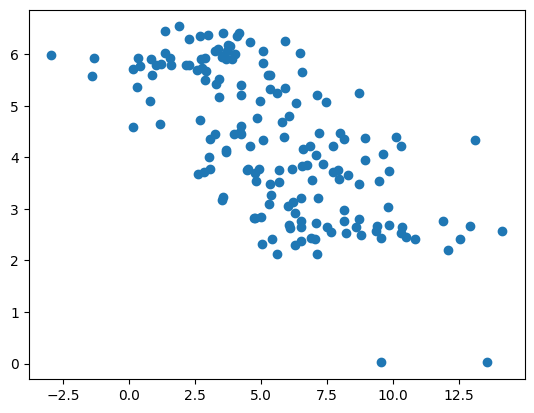

In [23]:
plt.scatter(df['PBI_vpa'],df['TM_SF'])
plt.show()

In [24]:
corr_PBI_TM=df['PBI_vpa'].corr(df['TM_SF'])
corr_PBI_TM

-0.6656412799444642

In [25]:
import statsmodels.api as sm
dfx=pd.DataFrame(df,columns=['PBI_vpa'])
dfy=pd.DataFrame(df,columns=['TM_SF'])
dfx1 = sm.add_constant(dfx)
dfx1.head()

,const,PBI_vpa
Mes,,
2004-01-01,1.0,3.674966
2004-02-01,1.0,4.245959
2004-03-01,1.0,5.774257
2004-04-01,1.0,4.247995
2004-05-01,1.0,3.950757


In [26]:
result = sm.OLS(dfy, dfx1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  TM_SF   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     129.7
Date:                Sat, 29 Jun 2024   Prob (F-statistic):           1.78e-22
Time:                        13:08:19   Log-Likelihood:                -240.95
No. Observations:                 165   AIC:                             485.9
Df Residuals:                     163   BIC:                             492.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9268      0.166     35.680      0.0

In [27]:
df.corr()

,PBI_vpa,IDI_vpa,IPN_Exp_vpa,IPN_Imp_vpa,TI_vpa,IPC_vpa,TD_mm3,TAMN_tea,TCI_IBProm,TM_SF
PBI_vpa,1.000000,0.838145,0.393048,0.582595,0.170312,-0.010019,0.212794,0.373722,-0.142776,-0.665641
IDI_vpa,0.838145,1.000000,0.376759,0.482075,0.211237,-0.082769,0.092031,0.245472,-0.285100,-0.587108
IPN_Exp_vpa,0.393048,0.376759,1.000000,0.704750,0.898618,-0.527383,0.505002,0.463816,0.148238,-0.533010
IPN_Imp_vpa,0.582595,0.482075,0.704750,1.000000,0.325247,-0.023187,0.448479,0.523367,-0.033645,-0.699183
TI_vpa,0.170312,0.211237,0.898618,0.325247,1.000000,-0.695031,0.381889,0.288557,0.211968,-0.279800
IPC_vpa,-0.010019,-0.082769,-0.527383,-0.023187,-0.695031,1.000000,-0.166387,-0.076661,-0.047299,0.057292
TD_mm3,0.212794,0.092031,0.505002,0.448479,0.381889,-0.166387,1.000000,0.809866,0.388972,-0.571837
TAMN_tea,0.373722,0.245472,0.463816,0.523367,0.288557,-0.076661,0.809866,1.000000,0.322918,-0.785976
TCI_IBProm,-0.142776,-0.285100,0.148238,-0.033645,0.211968,-0.047299,0.388972,0.322918,1.000000,0.025631
TM_SF,-0.665641,-0.587108,-0.533010,-0.699183,-0.279800,0.057292,-0.571837,-0.785976,0.025631,1.000000


# Dividimos nuestra muestra en 2 partes, In-Time y Out-of-Time

In [28]:
size = int(len(df)*0.8)
size

132

In [29]:
df_train = df.iloc[:size]
df_train.shape

(132, 10)

In [30]:
df_test = df.iloc[size:]
df_test.shape

(33, 10)

In [31]:
df_train.tail()

,PBI_vpa,IDI_vpa,IPN_Exp_vpa,IPN_Imp_vpa,TI_vpa,IPC_vpa,TD_mm3,TAMN_tea,TCI_IBProm,TM_SF
Mes,,,,,,,,,,
2014-08-01,1.371350,3.142972,-1.087040,-1.168398,0.082319,2.685209,5.898102,15.8752,2.8436,6.02
2014-09-01,2.713303,3.019853,-4.798544,-0.421840,-4.395245,2.738262,5.607209,15.6890,2.8906,5.91
2014-10-01,2.268771,2.321630,-5.847464,-3.000863,-2.934666,3.088040,5.693180,15.5535,2.9236,5.80
2014-11-01,0.136550,0.783037,-6.469251,-4.412563,-2.151630,3.159102,5.423094,15.6087,2.9196,5.71
2014-12-01,0.843747,3.538099,-7.419320,-7.057501,-0.389294,3.224061,5.556896,15.6694,2.9791,5.59


In [32]:
df_test.head()

,PBI_vpa,IDI_vpa,IPN_Exp_vpa,IPN_Imp_vpa,TI_vpa,IPC_vpa,TD_mm3,TAMN_tea,TCI_IBProm,TM_SF
Mes,,,,,,,,,,
2015-01-01,1.567260,-0.805154,-12.125348,-7.323596,-5.181203,3.073263,6.353279,16.166800,3.0593,5.80
2015-02-01,1.215902,4.032032,-12.815338,-8.670141,-4.538709,2.768585,6.891139,15.997900,3.0936,5.81
2015-03-01,2.970283,5.370892,-14.083677,-9.445927,-5.121525,3.020199,7.025578,16.077700,3.0959,6.38
2015-04-01,4.173686,4.989752,-14.456107,-10.466283,-4.456225,3.017413,6.808494,15.922333,3.1280,6.41
2015-05-01,1.347068,1.288929,-11.960318,-9.703631,-2.499200,3.366202,6.976651,16.004200,3.1571,6.45


## Ensayemos un modelo (Holt Winter)

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(df_train['TM_SF'],seasonal='add',seasonal_periods=12).fit() #trend='mul', seasonal='mul'

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [34]:
df_test_pred = fitted_model.forecast(33).rename('HW Forecast')
df_test_pred.head()

2015-01-01    5.578792
2015-02-01    5.684947
2015-03-01    6.013810
2015-04-01    6.119924
2015-05-01    6.155246
Freq: MS, Name: HW Forecast, dtype: float64

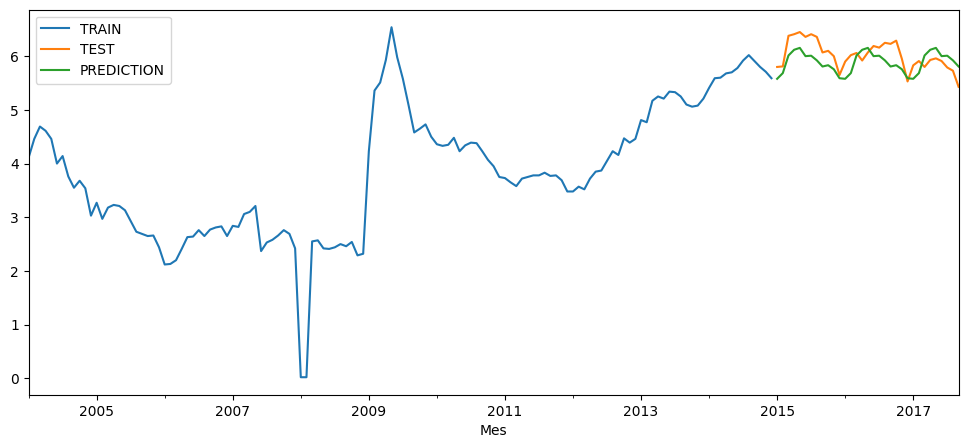

In [35]:
df_train['TM_SF'].plot(legend=True,label='TRAIN')
df_test['TM_SF'].plot(legend=True,label='TEST',figsize=(12,5))
df_test_pred.plot(legend=True,label='PREDICTION');

## Como vamos a medir y comparar nuestros modelos

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [37]:
mean_absolute_error(df_test['TM_SF'],df_test_pred)

0.24457352138784091

In [38]:
mean_squared_error(df_test['TM_SF'],df_test_pred)

0.0721848056452874

In [39]:
np.sqrt(mean_squared_error(df_test['TM_SF'],df_test_pred))

0.2686723015967359

## Un forecast para los puntos despues del test

In [40]:
final_model = ExponentialSmoothing(df['TM_SF'],seasonal='add').fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
forecast_pred = final_model.forecast(12)

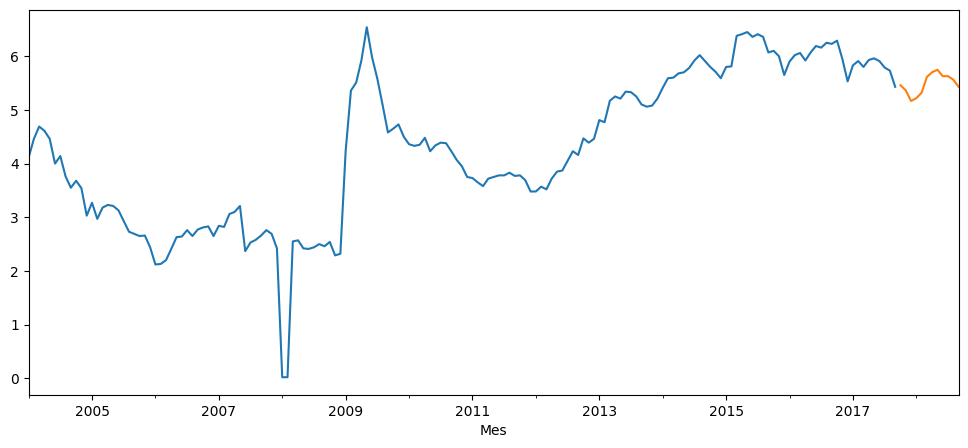

In [42]:
df['TM_SF'].plot(figsize=(12,5))
forecast_pred.plot();

# Estacionariedad y Estacionalidad

In [43]:
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller

In [ ]:
#help(adfuller)

In [44]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [45]:
adf_test(df_train.PBI_vpa,title='PBI')

Augmented Dickey-Fuller Test: PBI
ADF test statistic       -2.924585
p-value                   0.042563
# lags used              12.000000
# observations          119.000000
critical value (1%)      -3.486535
critical value (5%)      -2.886151
critical value (10%)     -2.579896
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [46]:
adf_test(df_train.TM_SF,title='TM')

Augmented Dickey-Fuller Test: TM
ADF test statistic       -1.809037
p-value                   0.375985
# lags used               3.000000
# observations          128.000000
critical value (1%)      -3.482501
critical value (5%)      -2.884398
critical value (10%)     -2.578960
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [47]:
adf_test(df_train.IDI_vpa,title='IDI')

Augmented Dickey-Fuller Test: IDI
ADF test statistic       -2.491857
p-value                   0.117468
# lags used              13.000000
# observations          118.000000
critical value (1%)      -3.487022
critical value (5%)      -2.886363
critical value (10%)     -2.580009
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [48]:
adf_test(df_train.TI_vpa,title='TI')

Augmented Dickey-Fuller Test: TI
ADF test statistic       -1.836257
p-value                   0.362616
# lags used              12.000000
# observations          119.000000
critical value (1%)      -3.486535
critical value (5%)      -2.886151
critical value (10%)     -2.579896
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [49]:
adf_test(df_train.IPC_vpa,title='IPC')

Augmented Dickey-Fuller Test: IPC
ADF test statistic       -2.954000
p-value                   0.039419
# lags used              13.000000
# observations          118.000000
critical value (1%)      -3.487022
critical value (5%)      -2.886363
critical value (10%)     -2.580009
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [50]:
adf_test(df_train.TD_mm3,title='TD')

Augmented Dickey-Fuller Test: TD
ADF test statistic       -0.564529
p-value                   0.878797
# lags used              13.000000
# observations          118.000000
critical value (1%)      -3.487022
critical value (5%)      -2.886363
critical value (10%)     -2.580009
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [51]:
adf_test(df_train.TAMN_tea,title='TAMN')

Augmented Dickey-Fuller Test: TAMN
ADF test statistic       -0.114992
p-value                   0.947925
# lags used               1.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [52]:
adf_test(df_train.TCI_IBProm,title='TC')

Augmented Dickey-Fuller Test: TC
ADF test statistic       -1.601328
p-value                   0.482926
# lags used              10.000000
# observations          121.000000
critical value (1%)      -3.485585
critical value (5%)      -2.885739
critical value (10%)     -2.579676
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
#PBI_vpa
#IDI_vpa
#TI_vpa
#IPC_vpa
#TD_mm3
#TAMN_tea
#TCI_IBProm
#TM_SF

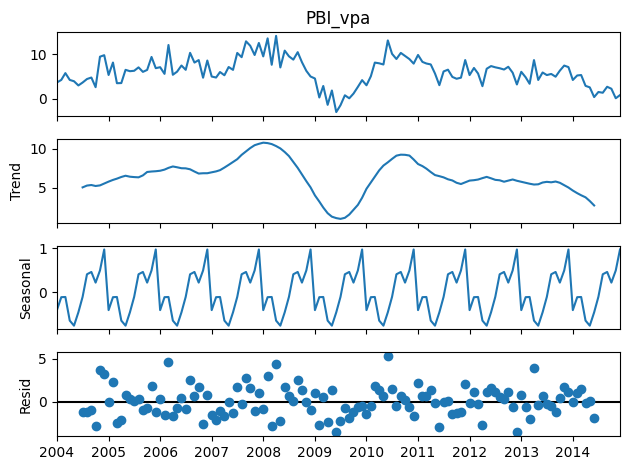

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dec = seasonal_decompose(df_train.PBI_vpa, model = "additive")
s_dec.plot()
plt.show()

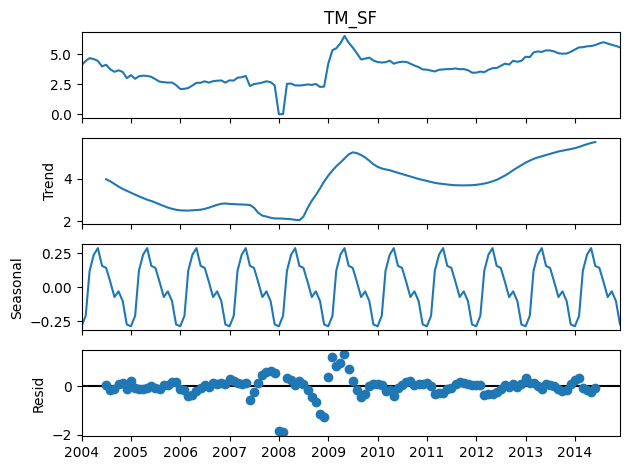

In [54]:
s_dec = seasonal_decompose(df_train.TM_SF, model = "additive")
s_dec.plot()
plt.show()

In [55]:
df_train['TM_SF_L1']=df_train['TM_SF'].diff()
df_train.head()

,PBI_vpa,IDI_vpa,IPN_Exp_vpa,IPN_Imp_vpa,TI_vpa,IPC_vpa,TD_mm3,TAMN_tea,TCI_IBProm,TM_SF,TM_SF_L1
Mes,,,,,,,,,,,
2004-01-01,3.674966,1.539064,21.895241,10.333426,10.478978,2.796658,10.100354,23.676494,3.5005,4.11,NaN
2004-02-01,4.245959,1.539064,23.212262,6.493451,15.699379,3.428220,10.487665,24.113038,3.4730,4.46,0.35
2004-03-01,5.774257,1.539064,35.402157,7.190386,26.319311,2.755869,10.637728,24.528710,3.4602,4.69,0.23
2004-04-01,4.247995,1.539064,35.932383,7.544888,26.395949,2.784744,10.495058,24.226751,3.4839,4.61,-0.08
2004-05-01,3.950757,1.539064,30.533346,10.228558,18.420624,3.181487,9.999498,24.385480,3.4864,4.46,-0.15


In [56]:
adf_test(df_train.TM_SF_L1,title='TM_L1')

Augmented Dickey-Fuller Test: TM_L1
ADF test statistic     -6.222554e+00
p-value                 5.180884e-08
# lags used             3.000000e+00
# observations          1.270000e+02
critical value (1%)    -3.482920e+00
critical value (5%)    -2.884580e+00
critical value (10%)   -2.579058e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [57]:
df_train['IDI_vpa_L1']=df_train['IDI_vpa'].diff()
df_train['TI_vpa_L1']=df_train['TI_vpa'].diff()
df_train['TD_mm3_L1']=df_train['TD_mm3'].diff()
df_train['TAMN_tea_L1']=df_train['TAMN_tea'].diff()
df_train['TCI_IBProm_L1']=df_train['TCI_IBProm'].diff()

In [58]:
adf_test(df_train.IDI_vpa_L1,title='IDI_L1')

Augmented Dickey-Fuller Test: IDI_L1
ADF test statistic       -4.726159
p-value                   0.000075
# lags used              12.000000
# observations          118.000000
critical value (1%)      -3.487022
critical value (5%)      -2.886363
critical value (10%)     -2.580009
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [59]:
adf_test(df_train.TI_vpa_L1,title='TI_L1')

Augmented Dickey-Fuller Test: TI_L1
ADF test statistic       -4.593131
p-value                   0.000133
# lags used              11.000000
# observations          119.000000
critical value (1%)      -3.486535
critical value (5%)      -2.886151
critical value (10%)     -2.579896
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [60]:
adf_test(df_train.TD_mm3_L1,title='TD_L1')

Augmented Dickey-Fuller Test: TD_L1
ADF test statistic       -3.590698
p-value                   0.005941
# lags used              13.000000
# observations          117.000000
critical value (1%)      -3.487517
critical value (5%)      -2.886578
critical value (10%)     -2.580124
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [61]:
adf_test(df_train.TAMN_tea_L1,title='TAMN_L1')

Augmented Dickey-Fuller Test: TAMN_L1
ADF test statistic     -9.360848e+00
p-value                 7.830733e-16
# lags used             0.000000e+00
# observations          1.300000e+02
critical value (1%)    -3.481682e+00
critical value (5%)    -2.884042e+00
critical value (10%)   -2.578770e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [62]:
adf_test(df_train.TCI_IBProm_L1,title='TCI_L1')

Augmented Dickey-Fuller Test: TCI_L1
ADF test statistic       -4.364117
p-value                   0.000343
# lags used               9.000000
# observations          121.000000
critical value (1%)      -3.485585
critical value (5%)      -2.885739
critical value (10%)     -2.579676
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


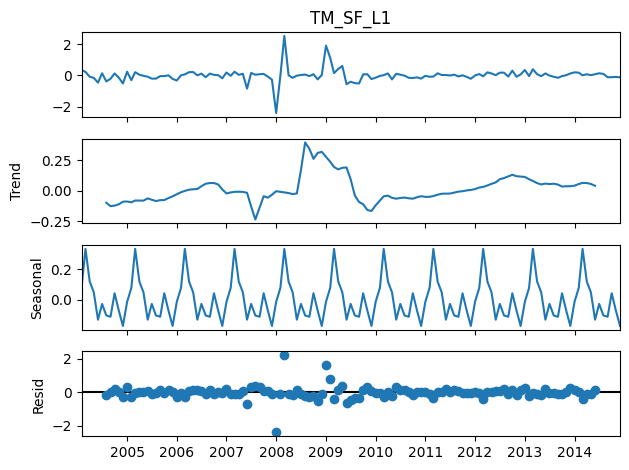

In [63]:
s_dec = seasonal_decompose(df_train.TM_SF_L1[1:], model = "additive")
s_dec.plot()
plt.show()

## Analicemos si hay una forma de causalidad a priori de las diferentes variables vs la Tasa de Morosidad

In [64]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
grangercausalitytests(df_train[['TM_SF','PBI_vpa']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4273  , p=0.2344  , df_denom=128, df_num=1
ssr based chi2 test:   chi2=1.4607  , p=0.2268  , df=1
likelihood ratio test: chi2=1.4526  , p=0.2281  , df=1
parameter F test:         F=1.4273  , p=0.2344  , df_denom=128, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8829  , p=0.4161  , df_denom=125, df_num=2
ssr based chi2 test:   chi2=1.8365  , p=0.3992  , df=2
likelihood ratio test: chi2=1.8237  , p=0.4018  , df=2
parameter F test:         F=0.8829  , p=0.4161  , df_denom=125, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3961  , p=0.7560  , df_denom=122, df_num=3
ssr based chi2 test:   chi2=1.2566  , p=0.7395  , df=3
likelihood ratio test: chi2=1.2506  , p=0.7409  , df=3
parameter F test:         F=0.3961  , p=0.7560  , df_denom=122, df_num=3


In [65]:
grangercausalitytests(df_train[['TM_SF','IDI_vpa']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0043  , p=0.9481  , df_denom=128, df_num=1
ssr based chi2 test:   chi2=0.0044  , p=0.9474  , df=1
likelihood ratio test: chi2=0.0044  , p=0.9474  , df=1
parameter F test:         F=0.0043  , p=0.9481  , df_denom=128, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4136  , p=0.6622  , df_denom=125, df_num=2
ssr based chi2 test:   chi2=0.8602  , p=0.6504  , df=2
likelihood ratio test: chi2=0.8574  , p=0.6514  , df=2
parameter F test:         F=0.4136  , p=0.6622  , df_denom=125, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3718  , p=0.2546  , df_denom=122, df_num=3
ssr based chi2 test:   chi2=4.3516  , p=0.2259  , df=3
likelihood ratio test: chi2=4.2798  , p=0.2328  , df=3
parameter F test:         F=1.3718  , p=0.2546  , df_denom=122, df_num=3


In [66]:
grangercausalitytests(df_train[['TM_SF','TI_vpa']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3854  , p=0.0382  , df_denom=128, df_num=1
ssr based chi2 test:   chi2=4.4881  , p=0.0341  , df=1
likelihood ratio test: chi2=4.4130  , p=0.0357  , df=1
parameter F test:         F=4.3854  , p=0.0382  , df_denom=128, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2981  , p=0.1047  , df_denom=125, df_num=2
ssr based chi2 test:   chi2=4.7801  , p=0.0916  , df=2
likelihood ratio test: chi2=4.6943  , p=0.0956  , df=2
parameter F test:         F=2.2981  , p=0.1047  , df_denom=125, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9055  , p=0.1322  , df_denom=122, df_num=3
ssr based chi2 test:   chi2=6.0446  , p=0.1095  , df=3
likelihood ratio test: chi2=5.9072  , p=0.1162  , df=3
parameter F test:         F=1.9055  , p=0.1322  , df_denom=122, df_num=3


In [67]:
grangercausalitytests(df_train[['TM_SF','TD_mm3']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3879  , p=0.5345  , df_denom=128, df_num=1
ssr based chi2 test:   chi2=0.3970  , p=0.5287  , df=1
likelihood ratio test: chi2=0.3964  , p=0.5290  , df=1
parameter F test:         F=0.3879  , p=0.5345  , df_denom=128, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6118  , p=0.0299  , df_denom=125, df_num=2
ssr based chi2 test:   chi2=7.5125  , p=0.0234  , df=2
likelihood ratio test: chi2=7.3035  , p=0.0259  , df=2
parameter F test:         F=3.6118  , p=0.0299  , df_denom=125, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5312  , p=0.0603  , df_denom=122, df_num=3
ssr based chi2 test:   chi2=8.0293  , p=0.0454  , df=3
likelihood ratio test: chi2=7.7893  , p=0.0506  , df=3
parameter F test:         F=2.5312  , p=0.0603  , df_denom=122, df_num=3


In [68]:
grangercausalitytests(df_train[['TM_SF','TAMN_tea']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8527  , p=0.1759  , df_denom=128, df_num=1
ssr based chi2 test:   chi2=1.8961  , p=0.1685  , df=1
likelihood ratio test: chi2=1.8825  , p=0.1700  , df=1
parameter F test:         F=1.8527  , p=0.1759  , df_denom=128, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0343  , p=0.1351  , df_denom=125, df_num=2
ssr based chi2 test:   chi2=4.2314  , p=0.1206  , df=2
likelihood ratio test: chi2=4.1640  , p=0.1247  , df=2
parameter F test:         F=2.0343  , p=0.1351  , df_denom=125, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1632  , p=0.3267  , df_denom=122, df_num=3
ssr based chi2 test:   chi2=3.6899  , p=0.2970  , df=3
likelihood ratio test: chi2=3.6381  , p=0.3033  , df=3
parameter F test:         F=1.1632  , p=0.3267  , df_denom=122, df_num=3


In [69]:
grangercausalitytests(df_train[['TM_SF','TCI_IBProm']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7855  , p=0.1838  , df_denom=128, df_num=1
ssr based chi2 test:   chi2=1.8274  , p=0.1764  , df=1
likelihood ratio test: chi2=1.8148  , p=0.1779  , df=1
parameter F test:         F=1.7855  , p=0.1838  , df_denom=128, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4752  , p=0.2327  , df_denom=125, df_num=2
ssr based chi2 test:   chi2=3.0684  , p=0.2156  , df=2
likelihood ratio test: chi2=3.0328  , p=0.2195  , df=2
parameter F test:         F=1.4752  , p=0.2327  , df_denom=125, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9064  , p=0.4402  , df_denom=122, df_num=3
ssr based chi2 test:   chi2=2.8751  , p=0.4113  , df=3
likelihood ratio test: chi2=2.8435  , p=0.4164  , df=3
parameter F test:         F=0.9064  , p=0.4402  , df_denom=122, df_num=3


In [70]:
grangercausalitytests(df_train[['TM_SF','IPC_vpa']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1054  , p=0.0255  , df_denom=128, df_num=1
ssr based chi2 test:   chi2=5.2251  , p=0.0223  , df=1
likelihood ratio test: chi2=5.1236  , p=0.0236  , df=1
parameter F test:         F=5.1054  , p=0.0255  , df_denom=128, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2548  , p=0.1091  , df_denom=125, df_num=2
ssr based chi2 test:   chi2=4.6899  , p=0.0959  , df=2
likelihood ratio test: chi2=4.6073  , p=0.0999  , df=2
parameter F test:         F=2.2548  , p=0.1091  , df_denom=125, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1975  , p=0.0259  , df_denom=122, df_num=3
ssr based chi2 test:   chi2=10.1429 , p=0.0174  , df=3
likelihood ratio test: chi2=9.7639  , p=0.0207  , df=3
parameter F test:         F=3.1975  , p=0.0259  , df_denom=122, df_num=3


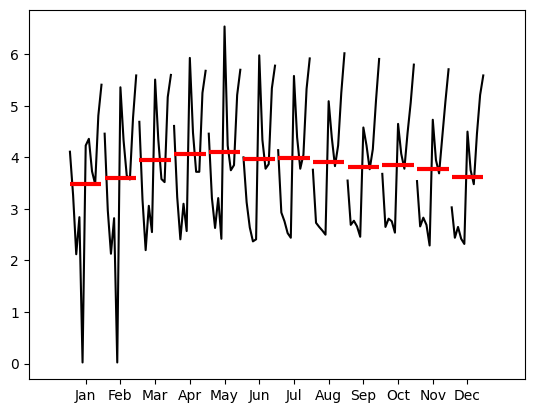

In [71]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
month_plot(df_train['TM_SF']);

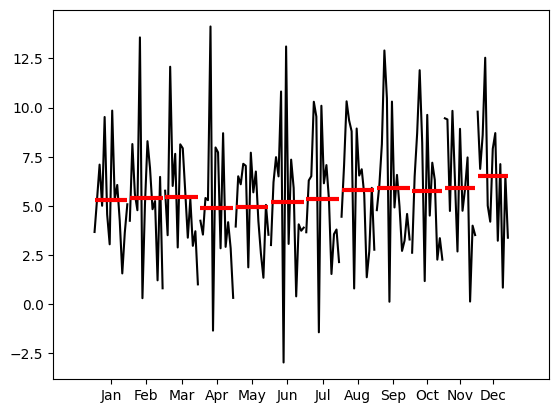

In [73]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
month_plot(df['PBI_vpa']);

# Análisis de Autocorrelaciones y Autocorrelaciones Parciales

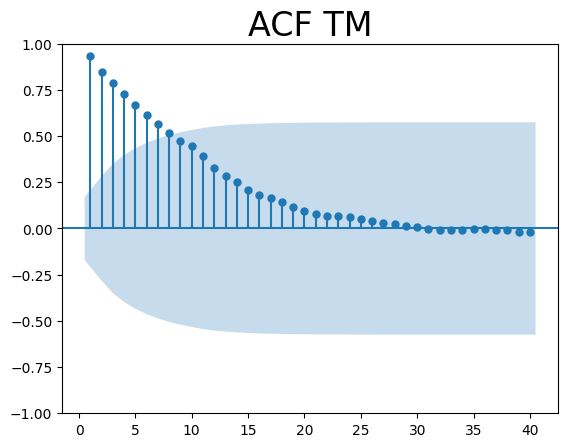

In [74]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df_train.TM_SF, lags = 40, zero = False)
plt.title("ACF TM", size = 24)
plt.show()

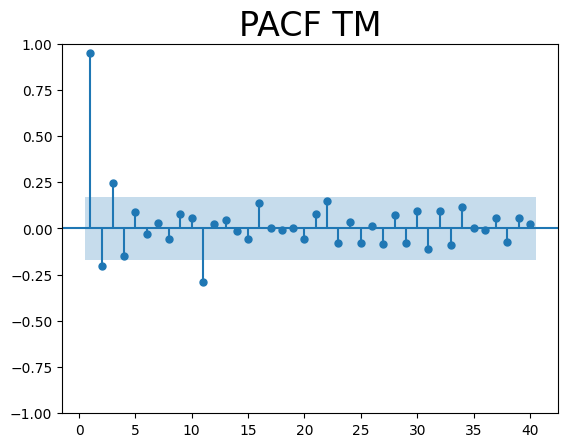

In [77]:
sgt.plot_pacf(df_train.TM_SF, lags = 40, zero = False, method = ('ols'))
plt.title("PACF TM", size = 24)
plt.show()

# Modelos AR

# TM

In [ ]:
from statsmodels.tsa.arima_model import ARMA
model_TM_ar1 = ARMA(df_train.TM_SF, order=(1,0))
TM_ar1 = model_TM_ar1.fit()
TM_ar1.summary()

In [ ]:
model_TM_ar2 = ARMA(df_train.TM_SF, order=(2,0))
TM_ar2 = model_TM_ar2.fit()
TM_ar2.summary()

In [ ]:
model_TM_ar3 = ARMA(df_train.TM_SF, order=(3,0))
TM_ar3 = model_TM_ar3.fit()
TM_ar3.summary()

In [ ]:
from scipy.stats.distributions import chi2
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
LLR_test(model_TM_ar1, model_TM_ar2)

In [ ]:
LLR_test(model_TM_ar2, model_TM_ar3)

In [ ]:
df_train['res_ar_TM'] = TM_ar2.resid
print(df_train.res_ar_TM.mean())
print(df_train.res_ar_TM.var())
print(sts.adfuller(df_train.res_ar_TM))

In [ ]:
sgt.plot_acf(df_train.res_ar_TM, zero = False, lags = 40)
plt.title("ACF Residuos de TM",size=24)
plt.show()

In [ ]:
df_train.res_ar_TM.plot(figsize=(20,5))
plt.title("Residuos de TM",size=24)
plt.show()

# Modelos MA

# TM

In [ ]:
model_TM_ma1 = ARMA(df_train.TM_SF, order=(0,1))
TM_ma1 = model_TM_ma1.fit()
TM_ma1.summary()

In [ ]:
df_train['res_ma_TM'] = TM_ma1.resid
print(df_train.res_ma_TM.mean())
print(df_train.res_ma_TM.var())
print(sts.adfuller(df_train.res_ma_TM))

In [ ]:
sgt.plot_acf(df_train.res_ma_TM, zero = False, lags = 40)
plt.title("ACF Residuos de TM",size=24)
plt.show()

In [ ]:
df_train.res_ma_TM.plot(figsize=(20,5))
plt.title("Residuos de TM",size=24)
plt.show()

# Modelo ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model_TM_ar1_i1_ma1 = ARIMA(df_train.TM_SF, order=(1,1,1))
TM_ar1_i1_ma1 = model_TM_ar1_i1_ma1.fit()
TM_ar1_i1_ma1.summary()

In [ ]:
df_train['res_TM_ar1_i1_ma1'] = TM_ar1_i1_ma1.resid
sgt.plot_acf(df_train.res_TM_ar1_i1_ma1[1:], zero = False, lags = 40)
plt.title("ACF Residuos de TM ARIMA(1,1,1)",size=20)
plt.show()

In [ ]:
model_TM_ar1_i1_ma1 = ARIMA(df_train.TM_SF, order=(1,1,1))
TM_ar1_i1_ma1 = model_TM_ar1_i1_ma1.fit()

model_TM_ar1_i1_ma2 = ARIMA(df_train.TM_SF, order=(1,1,2))
TM_ar1_i1_ma2 = model_TM_ar1_i1_ma2.fit()

model_TM_ar1_i1_ma3 = ARIMA(df_train.TM_SF, order=(1,1,3))
TM_ar1_i1_ma3 = model_TM_ar1_i1_ma3.fit()

model_TM_ar2_i1_ma1 = ARIMA(df_train.TM_SF, order=(2,1,1))
TM_ar2_i1_ma1 = model_TM_ar2_i1_ma1.fit()

model_TM_ar3_i1_ma1 = ARIMA(df_train.TM_SF, order=(3,1,1))
TM_ar3_i1_ma1 = model_TM_ar3_i1_ma1.fit()

model_TM_ar3_i1_ma2 = ARIMA(df_train.TM_SF, order=(3,1,2))
TM_ar3_i1_ma2 = model_TM_ar3_i1_ma2.fit()

In [ ]:
print("ARIMA(1,1,1):  \t LL = ", TM_ar1_i1_ma1.llf, "\t AIC = ", TM_ar1_i1_ma1.aic)
print("ARIMA(1,1,2):  \t LL = ", TM_ar1_i1_ma2.llf, "\t AIC = ", TM_ar1_i1_ma2.aic)
print("ARIMA(1,1,3):  \t LL = ", TM_ar1_i1_ma3.llf, "\t AIC = ", TM_ar1_i1_ma3.aic)
print("ARIMA(2,1,1):  \t LL = ", TM_ar2_i1_ma1.llf, "\t AIC = ", TM_ar2_i1_ma1.aic)
print("ARIMA(3,1,1):  \t LL = ", TM_ar3_i1_ma1.llf, "\t AIC = ", TM_ar3_i1_ma1.aic)
print("ARIMA(3,1,2):  \t LL = ", TM_ar3_i1_ma2.llf, "\t AIC = ", TM_ar3_i1_ma2.aic)

In [ ]:
LLR_test(model_TM_ar1_i1_ma3, model_TM_ar3_i1_ma2, DF = 1)

In [ ]:
df_train['res_TM_ar1_i1_ma3'] = TM_ar1_i1_ma3.resid
sgt.plot_acf(df_train.res_TM_ar1_i1_ma3[1:], zero = False, lags = 40)
plt.title("ACF Residuos ARIMA(1,1,3)", size=20)
plt.show()

## Hasta aqui podemos hacer un testeo del modelo

In [ ]:
start=len(df_train)
end=len(df_train)+len(df_test)-1
test_pred = TM_ar1_i1_ma3.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA Predictions')

In [ ]:
test_pred.head()

In [ ]:
df_train['TM_SF'].plot(legend=True,label='TRAIN')
df_test['TM_SF'].plot(legend=True,label='TEST')
test_pred.plot(legend=True,figsize=(12,6));

# Modelo SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_TM_sarimax = SARIMAX(df_train.TM_SF, exog = df_train[['PBI_vpa','IPC_vpa']], order=(1,1,3), seasonal_order = (0,0,0,12))
TM_sarimax = model_TM_sarimax.fit()
TM_sarimax.summary()

In [ ]:
start=len(df_train)
end=len(df_train)+len(df_test)-1

In [ ]:
test_pred = TM_sarimax.predict(exog=df_test[['PBI_vpa','IPC_vpa']], start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX Predictions')
test_pred.head()

In [ ]:
df_train['TM_SF'].plot(legend=True,label='TRAIN')
df_test['TM_SF'].plot(legend=True,label='TEST')
test_pred.plot(legend=True,figsize=(12,6));

# AutoARIMA

In [ ]:
#No olvidar instalar el paquete pmdarima
from pmdarima.arima import auto_arima
model_TM_auto = auto_arima(df_train.TM_SF,exogenous = df_train[['PBI_vpa','IPC_vpa']],seasonal=True,m=12)
model_TM_auto

In [ ]:
model_TM_auto.summary()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_TM_sarimax = SARIMAX(df_train.TM_SF, exog = df_train[['PBI_vpa','IPC_vpa']], order=(0,1,2), seasonal_order = (0,0,2,12))
TM_sarimax = model_TM_sarimax.fit()
TM_sarimax.summary()

# Test del Modelo

In [ ]:
start=len(df_train)
end=len(df_train)+len(df_test)-1

In [ ]:
test_pred = TM_sarimax.predict(exog=df_test[['PBI_vpa','IPC_vpa']],start=start, end=end, dynamic=False, typ='levels').rename('Auto ARIMA Predictions')
test_pred.head()

In [ ]:
df_train['TM_SF'].plot(legend=True,label='TRAIN')
df_test['TM_SF'].plot(legend=True,label='TEST')
test_pred.plot(legend=True,figsize=(12,6));

# Modelo VAR

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

In [ ]:
#PBI_vpa
#TI_vpa
#TD_mm3
#IPC_vpa
#TM_SF_L1

In [ ]:
adf_test(df['TM_SF'])

In [ ]:
adf_test(df['IPC_vpa'])

In [ ]:
adf_test(df['PBI_vpa'])

In [ ]:
adf_test(df['TI_vpa'])

In [ ]:
adf_test(df['TD_mm3'])

In [ ]:
df['TI_vpa_L1']=df['TI_vpa'].diff()
df['TD_mm3_L1']=df['TD_mm3'].diff()
df['TM_SF_L1'] =df['TM_SF'].diff()

In [ ]:
df_transformed=df[['TM_SF_L1','TI_vpa_L1','TD_mm3_L1','PBI_vpa','IPC_vpa']]

In [ ]:
df_transformed=df_transformed.dropna()
df_transformed

In [ ]:
adf_test(df_transformed['TM_SF_L1'])

In [ ]:
adf_test(df_transformed['TI_vpa_L1'])

In [ ]:
adf_test(df_transformed['TD_mm3_L1'])

In [ ]:
df_transformed

In [ ]:
size = int(len(df_transformed)*0.8)
size

In [ ]:
dft_train = df_transformed.iloc[:size]
dft_train.shape

In [ ]:
dft_test = df_transformed.iloc[size:]
dft_test.shape

In [ ]:
model = VAR(dft_train)
for i in [1,2,3,4,5,6,7]:
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

In [ ]:
model.endog_names

In [ ]:
results = model.fit(3)
results.summary()

In [ ]:
lag_order = results.k_ar
lag_order

In [ ]:
z = results.forecast(y=dft_train.values[-lag_order:], steps=33)
z

In [ ]:
dft_test

In [ ]:
idx = pd.date_range('1/1/2015', periods=33, freq='MS')
dft_forecast = pd.DataFrame(z, index=idx, columns=['TM_SF_L1', 'TI_vpa_L1', 'TD_mm3_L1', 'PBI_vpa', 'IPC_vpa'])
dft_forecast

In [ ]:
dft_forecast['TM_SF_Forecast'] = df['TM_SF'].iloc[-33-1] + dft_forecast['TM_SF_L1'].cumsum()
dft_forecast

In [ ]:
results.plot();

In [ ]:
results.plot_forecast(33);

In [ ]:
df['TM_SF'][-33:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
dft_forecast['TM_SF_Forecast'].plot(legend=True);